In [1]:
!pwd

/woldlab/loxcyc/home/diane/proj/encode-202006-jamboree-detrout-rna-sc-pipeline/adrenal/ENCSR724KET_16f_nuc


In [12]:
import pandas
import numpy
import pysam
from matplotlib import pyplot
from pathlib import Path
from collections import Counter

In [3]:
analysis_dir = Path("fullsolo_multi_eoi_container")
alignment = analysis_dir / "Aligned.sortedByCoord.out.bam"

In [4]:
cell_barcodes = {}
cell_gene_barcodes = {}

for read in pysam.AlignmentFile(alignment, "rb"):
    if read.has_tag("gx") and read.has_tag("CB") and read.has_tag("UB"):
        cell = read.get_tag("CB")
        umi = read.get_tag("UB")
        counts = cell_barcodes.setdefault(cell, Counter())
        counts[umi] += 1
        
        #genes = read.get_tag("gx").split(",")[0]
        #gene_counts = cell_gene_barcodes.setdefault(cell, Counter())
        #for gene in genes:
        #    gene_counts[(umi, gene)] += 1 / len(genes)

In [5]:
len(cell_barcodes)

708212

In [7]:
next(iter((cell_barcodes)))

'CGATTATCACACTAAT'

In [9]:
len(cell_barcodes['CGATTATCACACTAAT'])

41385

In [10]:
sum(cell_barcodes['CGATTATCACACTAAT'].values())

95746

In [14]:
fraction = []
for cell in cell_barcodes:
    unique = len(cell_barcodes[cell])
    total = sum(cell_barcodes[cell].values())
    fraction.append(1 - (unique/total))

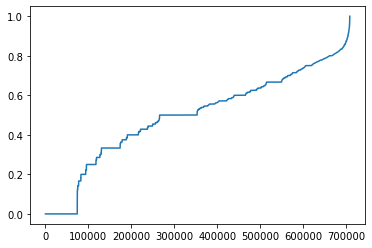

In [15]:
pyplot.plot(numpy.arange(len(fraction)), sorted(fraction))